# Q1 and Q3 and Q4

Epoch [100/1000], Loss: 0.0068
Epoch [200/1000], Loss: 0.0066
Epoch [300/1000], Loss: 0.0066
Epoch [400/1000], Loss: 0.0066
Epoch [500/1000], Loss: 0.0066
Epoch [600/1000], Loss: 0.0066
Epoch [700/1000], Loss: 0.0066
Epoch [800/1000], Loss: 0.0066
Epoch [900/1000], Loss: 0.0066
Epoch [1000/1000], Loss: 0.0066


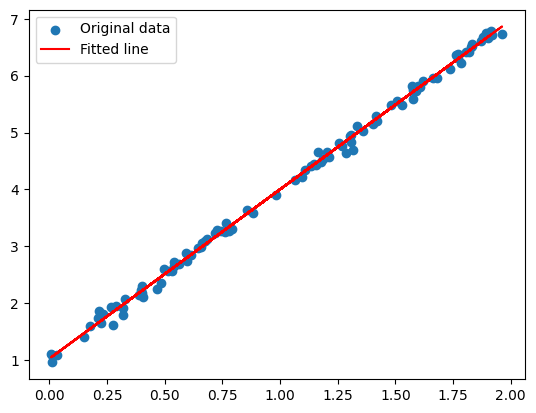

In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Generate synthetic data
torch.manual_seed(42)  # For reproducibility
X = 2 * torch.rand(100, 1)  # Random input values between 0 and 2
y = 3 * X + 1 + 0.1 * torch.randn(100, 1)  # Linear relationship with some noise

# Define the linear regression model
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(1, 1)  # One input feature, one output

    def forward(self, x):
        return self.linear(x)

# Instantiate the model, loss function, and optimizer
model = LinearRegressionModel()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

# Training loop
num_epochs = 1000

for epoch in range(num_epochs):
    # Forward pass
    y_pred = model(X)

    # Compute the loss
    loss = criterion(y_pred, y)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print the loss every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

# Plot the results
plt.scatter(X.numpy(), y.numpy(), label='Original data')
plt.plot(X.numpy(), model(X).detach().numpy(), 'r', label='Fitted line')
plt.legend()
plt.show()


# Q2 Experiment with your learning rate. You should see that large learning rate will cause gradient to explode. Print a learning rate that makes the optimizer explode

In [13]:
import torch
import torch.nn as nn
import torch.optim as optim

# Generate synthetic data
torch.manual_seed(42)  # For reproducibility
X = 2 * torch.rand(100, 1)  # Random input values between 0 and 2
y = 3 * X + 1 + 0.1 * torch.randn(100, 1)  # Linear relationship with some noise

# Define the linear regression model
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(1, 1)  # One input feature, one output

    def forward(self, x):
        return self.linear(x)

# Set a range of learning rates between 0 and 1 to experiment with
learning_rates = [0.01, 0.1, 0.5, 0.8, 1.0]

for lr in learning_rates:
    print(f"\nExperimenting with learning rate: {lr}")

    # Instantiate the model, loss function, and optimizer
    model = LinearRegressionModel()
    criterion = nn.MSELoss()
    optimizer = optim.SGD(model.parameters(), lr=lr)

    # Training loop
    num_epochs = 1000

    for epoch in range(num_epochs):
        # Forward pass
        y_pred = model(X)

        # Compute the loss
        loss = criterion(y_pred, y)

        # Check if the loss becomes NaN
        if torch.isnan(loss):
            print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: NaN')
            break

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # # Print the loss every 100 epochs
        # if (epoch + 1) % 100 == 0:
        #     print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

    else:
        print("Training completed without NaN loss.")



Experimenting with learning rate: 0.01
Training completed without NaN loss.

Experimenting with learning rate: 0.1
Training completed without NaN loss.

Experimenting with learning rate: 0.5
Epoch [383/1000], Loss: NaN

Experimenting with learning rate: 0.8
Epoch [93/1000], Loss: NaN

Experimenting with learning rate: 1.0
Epoch [72/1000], Loss: NaN


# Q5 Add an outlier sample data, and train one model with MSE loss and one model with MAE loss

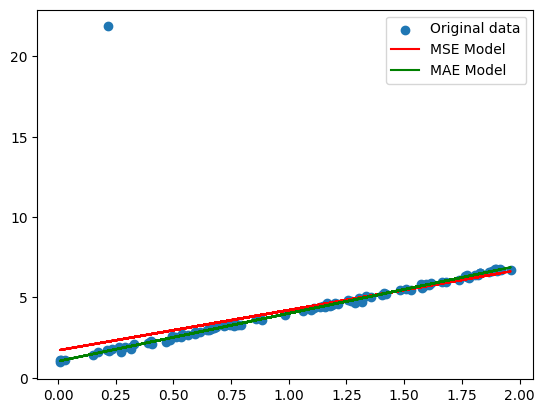

In [16]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Generate synthetic data with an outlier
torch.manual_seed(42)  # For reproducibility
X = 2 * torch.rand(100, 1)  # Random input values between 0 and 2
y = 3 * X + 1 + 0.1 * torch.randn(100, 1)  # Linear relationship with some noise
y[75] = y[75] + 20  # Add an outlier to the 75th sample

# Define the linear regression model
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(1, 1)  # One input feature, one output

    def forward(self, x):
        return self.linear(x)

# Training loop function to generalize training process
def train_model(model, criterion, optimizer, num_epochs=1000):
    for epoch in range(num_epochs):
        # Forward pass
        y_pred = model(X)

        # Compute the loss
        loss = criterion(y_pred, y)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # # Print the loss every 100 epochs
        # if (epoch + 1) % 100 == 0:
        #     print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

# Model with MSE loss
mse_model = LinearRegressionModel()
mse_criterion = nn.MSELoss()
mse_optimizer = optim.SGD(mse_model.parameters(), lr=0.01)

# print("Training model with MSE loss:")
train_model(mse_model, mse_criterion, mse_optimizer)

# Model with MAE loss
mae_model = LinearRegressionModel()
mae_criterion = nn.L1Loss()  # Use L1Loss for Mean Absolute Error
mae_optimizer = optim.SGD(mae_model.parameters(), lr=0.01)

# print("\nTraining model with MAE loss:")
train_model(mae_model, mae_criterion, mae_optimizer)

# Plot the results
plt.scatter(X.numpy(), y.numpy(), label='Original data')
plt.plot(X.numpy(), mse_model(X).detach().numpy(), 'r', label='MSE Model')
plt.plot(X.numpy(), mae_model(X).detach().numpy(), 'g', label='MAE Model')
plt.legend()
plt.show()



Training MSE model for Example 1:
Epoch [100/1000], Loss: 3.9657
Epoch [200/1000], Loss: 3.9634
Epoch [300/1000], Loss: 3.9633
Epoch [400/1000], Loss: 3.9633
Epoch [500/1000], Loss: 3.9633
Epoch [600/1000], Loss: 3.9633
Epoch [700/1000], Loss: 3.9633
Epoch [800/1000], Loss: 3.9633
Epoch [900/1000], Loss: 3.9633
Epoch [1000/1000], Loss: 3.9633

Training MAE model for Example 1:
Epoch [100/1000], Loss: 2.2046
Epoch [200/1000], Loss: 0.5073
Epoch [300/1000], Loss: 0.3344
Epoch [400/1000], Loss: 0.2741
Epoch [500/1000], Loss: 0.2657
Epoch [600/1000], Loss: 0.2653
Epoch [700/1000], Loss: 0.2652
Epoch [800/1000], Loss: 0.2652
Epoch [900/1000], Loss: 0.2652
Epoch [1000/1000], Loss: 0.2652
Epoch [100/1000], Loss: 3.9657
Epoch [200/1000], Loss: 3.9634
Epoch [300/1000], Loss: 3.9633
Epoch [400/1000], Loss: 3.9633
Epoch [500/1000], Loss: 3.9633
Epoch [600/1000], Loss: 3.9633
Epoch [700/1000], Loss: 3.9633
Epoch [800/1000], Loss: 3.9633
Epoch [900/1000], Loss: 3.9633
Epoch [1000/1000], Loss: 3.96

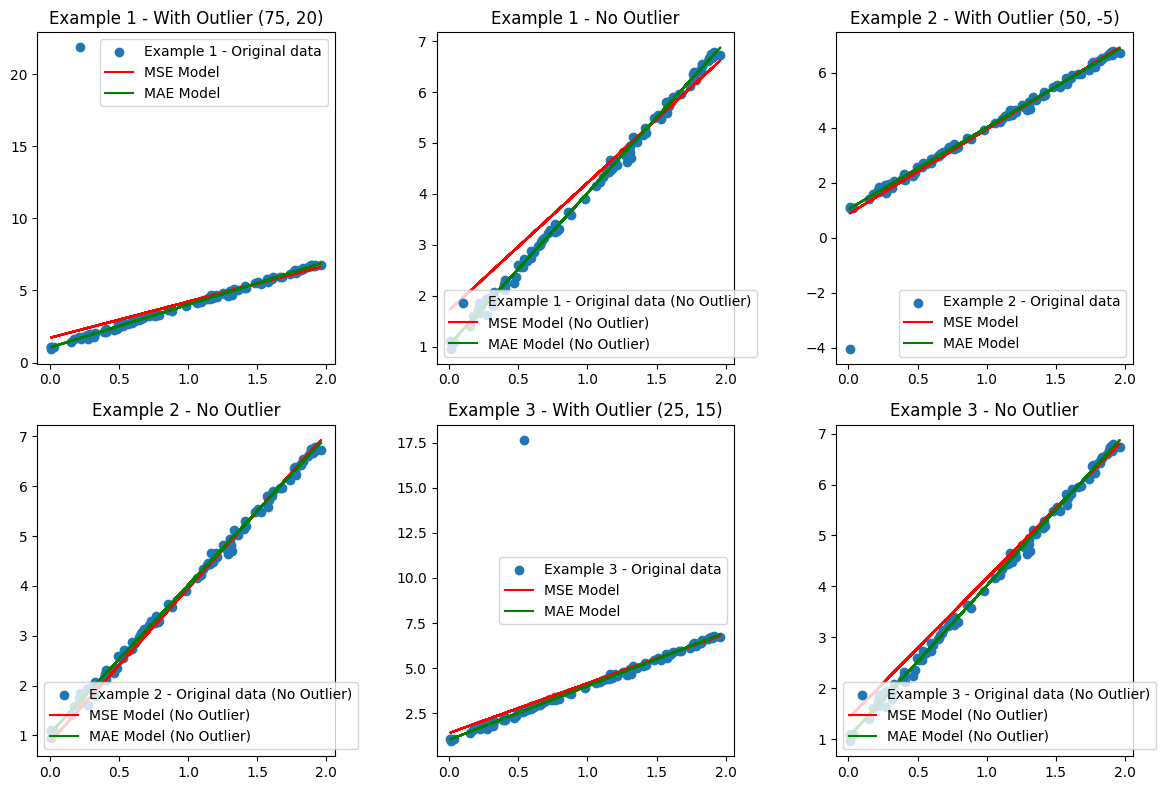

In [19]:
# TODO : Q6

import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Function to generate synthetic data with an outlier
def generate_data(outlier_index, outlier_value):
    torch.manual_seed(42)  # For reproducibility
    X = 2 * torch.rand(100, 1)  # Random input values between 0 and 2
    y = 3 * X + 1 + 0.1 * torch.randn(100, 1)  # Linear relationship with some noise
    y[outlier_index] = y[outlier_index] + outlier_value  # Add an outlier
    return X, y

# Define the linear regression model
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(1, 1)  # One input feature, one output

    def forward(self, x):
        return self.linear(x)

# Training loop function to generalize training process
def train_model(model, criterion, optimizer, num_epochs=1000):
    for epoch in range(num_epochs):
        # Forward pass
        y_pred = model(X)

        # Compute the loss
        loss = criterion(y_pred, y)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Print the loss every 100 epochs
        if (epoch + 1) % 100 == 0:
            print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

# Generate three examples with different outliers
examples = [
    {"index": 75, "value": 20},
    {"index": 50, "value": -5},
    {"index": 25, "value": 15}
]

# Plot the results for each example
plt.figure(figsize=(12, 8))

for i, example in enumerate(examples, 1):
    outlier_index = example["index"]
    outlier_value = example["value"]

    # Generate synthetic data
    X, y = generate_data(outlier_index, outlier_value)

    # Model with MSE loss
    mse_model = LinearRegressionModel()
    mse_criterion = nn.MSELoss()
    mse_optimizer = optim.SGD(mse_model.parameters(), lr=0.01)

    print(f"\nTraining MSE model for Example {i}:")
    train_model(mse_model, mse_criterion, mse_optimizer)

    # Model with MAE loss
    mae_model = LinearRegressionModel()
    mae_criterion = nn.L1Loss()  # Use L1Loss for Mean Absolute Error
    mae_optimizer = optim.SGD(mae_model.parameters(), lr=0.01)

    print(f"\nTraining MAE model for Example {i}:")
    train_model(mae_model, mae_criterion, mae_optimizer)

    # Plot the results
    plt.subplot(2, 3, i * 2 - 1)
    plt.scatter(X.numpy(), y.numpy(), label=f'Example {i} - Original data')
    plt.plot(X.numpy(), mse_model(X).detach().numpy(), 'r', label='MSE Model')
    plt.plot(X.numpy(), mae_model(X).detach().numpy(), 'g', label='MAE Model')
    plt.title(f'Example {i} - With Outlier ({outlier_index}, {outlier_value})')
    plt.legend()

    # Plot the original regression line without outlier
    X_no_outlier, y_no_outlier = generate_data(outlier_index, 0)
    mse_model_no_outlier = LinearRegressionModel()
    mae_model_no_outlier = LinearRegressionModel()

    mse_optimizer_no_outlier = optim.SGD(mse_model_no_outlier.parameters(), lr=0.01)
    mae_optimizer_no_outlier = optim.SGD(mae_model_no_outlier.parameters(), lr=0.01)

    train_model(mse_model_no_outlier, mse_criterion, mse_optimizer_no_outlier)
    train_model(mae_model_no_outlier, mae_criterion, mae_optimizer_no_outlier)

    plt.subplot(2, 3, i * 2)
    plt.scatter(X_no_outlier.numpy(), y_no_outlier.numpy(), label=f'Example {i} - Original data (No Outlier)')
    plt.plot(X_no_outlier.numpy(), mse_model_no_outlier(X_no_outlier).detach().numpy(), 'r', label='MSE Model (No Outlier)')
    plt.plot(X_no_outlier.numpy(), mae_model_no_outlier(X_no_outlier).detach().numpy(), 'g', label='MAE Model (No Outlier)')
    plt.title(f'Example {i} - No Outlier')
    plt.legend()

plt.tight_layout()
plt.show()
